Nama : Fakhri Maulana Nurjaman

Email : fakhrimaulana046@upi.edu

Deskripsi

data yang digunakan adalah data dari https://www.kaggle.com/hassanamin/atis-airlinetravelinformationsystem

In [3]:
from google.colab import files
files.upload()

Saving atis_intents.csv to atis_intents.csv
Saving atis_intents_test.csv to atis_intents_test.csv
Saving atis_intents_train.csv to atis_intents_train.csv


{'atis_intents.csv': b"atis_flight, i want to fly from boston at 838 am and arrive in denver at 1110 in the morning\natis_flight, what flights are available from pittsburgh to baltimore on thursday morning\natis_flight_time, what is the arrival time in san francisco for the 755 am flight leaving washington\natis_airfare, cheapest airfare from tacoma to orlando\natis_airfare, round trip fares from pittsburgh to philadelphia under 1000 dollars\natis_flight, i need a flight tomorrow from columbus to minneapolis\natis_aircraft, what kind of aircraft is used on a flight from cleveland to dallas\natis_flight, show me the flights from pittsburgh to los angeles on thursday\natis_flight, all flights from boston to washington\natis_ground_service, what kind of ground transportation is available in denver\natis_flight, show me the flights from dallas to san francisco\natis_flight, show me the flights from san diego to newark by way of houston\natis_airport, what's the airport at orlando\natis_fli

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [9]:
df = pd.read_csv('atis_intents.csv', names=['Label', 'Sequence'])
df.head()

,Label,Sequence
0,atis_flight,i want to fly from boston at 838 am and arriv...
1,atis_flight,what flights are available from pittsburgh to...
2,atis_flight_time,what is the arrival time in san francisco for...
3,atis_airfare,cheapest airfare from tacoma to orlando
4,atis_airfare,round trip fares from pittsburgh to philadelp...


In [17]:
print(df.Label.unique())
print()
print(len(df.Label.unique()))

['atis_flight' 'atis_flight_time' 'atis_airfare' 'atis_aircraft'
 'atis_ground_service' 'atis_airport' 'atis_airline' 'atis_distance'
 'atis_abbreviation' 'atis_ground_fare' 'atis_quantity' 'atis_city'
 'atis_flight_no' 'atis_capacity' 'atis_flight#atis_airfare' 'atis_meal'
 'atis_restriction' 'atis_airline#atis_flight_no'
 'atis_ground_service#atis_ground_fare' 'atis_airfare#atis_flight_time'
 'atis_cheapest' 'atis_aircraft#atis_flight#atis_flight_no']

22


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4978 entries, 0 to 4977
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Label     4978 non-null   object
 1   Sequence  4978 non-null   object
dtypes: object(2)
memory usage: 77.9+ KB


In [133]:
df.groupby("Label").count()

,Sequence
Label,
atis_abbreviation,147
atis_aircraft,81
atis_aircraft#atis_flight#atis_flight_no,1
atis_airfare,423
atis_airfare#atis_flight_time,1
atis_airline,157
atis_airline#atis_flight_no,2
atis_airport,20
atis_capacity,16


In [23]:
categori = pd.get_dummies(df.Label)
new_df = pd.concat([df, categori], axis=1)
new_df = new_df.drop(columns='Label')
new_df

,Sequence,atis_abbreviation,atis_aircraft,atis_aircraft#atis_flight#atis_flight_no,atis_airfare,atis_airfare#atis_flight_time,atis_airline,atis_airline#atis_flight_no,atis_airport,atis_capacity,atis_cheapest,atis_city,atis_distance,atis_flight,atis_flight#atis_airfare,atis_flight_no,atis_flight_time,atis_ground_fare,atis_ground_service,atis_ground_service#atis_ground_fare,atis_meal,atis_quantity,atis_restriction
0,i want to fly from boston at 838 am and arriv...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,what flights are available from pittsburgh to...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,what is the arrival time in san francisco for...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,cheapest airfare from tacoma to orlando,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,round trip fares from pittsburgh to philadelp...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,what is the airfare for flights from denver t...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4974,do you have any flights from denver to baltim...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4975,which airlines fly into and out of denver,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4976,does continental fly from boston to san franc...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [92]:
sentence

array([' i want to fly from boston at 838 am and arrive in denver at 1110 in the morning',
       ' what flights are available from pittsburgh to baltimore on thursday morning',
       ' what is the arrival time in san francisco for the 755 am flight leaving washington',
       ..., ' which airlines fly into and out of denver',
       ' does continental fly from boston to san francisco with a stop in denver',
       ' is there a delta flight from denver to san francisco'],
      dtype=object)

In [29]:
sentence = new_df.Sequence.values
label = new_df[['atis_flight', 'atis_flight_time', 'atis_airfare', 'atis_aircraft', 
                'atis_ground_service', 'atis_airport', 'atis_airline', 'atis_distance',
                'atis_abbreviation', 'atis_ground_fare', 'atis_quantity', 'atis_city',
                'atis_flight_no', 'atis_capacity', 'atis_flight#atis_airfare', 'atis_meal',
                'atis_restriction', 'atis_airline#atis_flight_no', 'atis_ground_service#atis_ground_fare',
                'atis_airfare#atis_flight_time', 'atis_cheapest', 'atis_aircraft#atis_flight#atis_flight_no']].values

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [40]:
# Bagi data latih dan data test
sentence_latih, sentence_test, label_latih, label_test = train_test_split(sentence, label, test_size=0.2)

#Tokenisasi
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(sentence_latih)
tokenizer.fit_on_texts(sentence_test)

sequence_latih = tokenizer.texts_to_sequences(sentence_latih)
sequence_test = tokenizer.texts_to_sequences(sentence_test)

#padding
padded_latih = pad_sequences(sequence_latih)
padded_test = pad_sequences(sequence_test)

In [41]:
padded_test

array([[  0,   0,   0, ...,  17,  92, 260],
       [  0,   0,   0, ..., 185,   6, 427],
       [  0,   0,   0, ...,  90,   2, 184],
       ...,
       [  0,   0,   0, ...,   2,  12,  15],
       [  0,   0,   0, ...,  20,   2,  18],
       [  0,   0,   0, ...,  58,  16,  13]], dtype=int32)

In [156]:
print(tokenizer.word_index)

{'x': 1, 'to': 2, 'from': 3, 'flights': 4, 'the': 5, 'on': 6, 'me': 7, 'what': 8, 'flight': 9, 'show': 10, 'boston': 11, 'denver': 12, 'san': 13, 'a': 14, 'in': 15, 'francisco': 16, 'and': 17, 'atlanta': 18, 'i': 19, 'pittsburgh': 20, 'is': 21, 'baltimore': 22, 'dallas': 23, 'philadelphia': 24, 'all': 25, 'like': 26, 'are': 27, 'airlines': 28, 'list': 29, 'between': 30, 'of': 31, 'that': 32, 'washington': 33, 'please': 34, 'leaving': 35, 'pm': 36, 'first': 37, 'fly': 38, 'morning': 39, 'would': 40, 'for': 41, 'oakland': 42, 'you': 43, 'there': 44, 'fare': 45, 'does': 46, 'after': 47, 'class': 48, "i'd": 49, 'ground': 50, 'transportation': 51, 'trip': 52, 'before': 53, 'wednesday': 54, 'with': 55, 'which': 56, 'give': 57, 'new': 58, 'cheapest': 59, 'need': 60, 'leave': 61, 'american': 62, 'city': 63, 'arriving': 64, 'round': 65, 'york': 66, 'want': 67, 'nonstop': 68, 'available': 69, 'one': 70, 'afternoon': 71, 'have': 72, 'arrive': 73, 'way': 74, 'fares': 75, 'monday': 76, 'how': 77, '

In [84]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
                                    tf.keras.layers.LSTM(64),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dense(32, activation='relu'),
                                    tf.keras.layers.Dense(22, activation='softmax'),
                                    tf.keras.layers.Dropout(0.01)])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.95):
      print("\nAkurasi telah mencapai > 95%!")
      self.model.stop_training = True

callback = myCallback()

In [85]:
history = model.fit(padded_latih, label_latih,
                    callbacks=[callback],
                    epochs=30,
                    validation_data=(padded_test, label_test),
                    batch_size=128,
                    verbose=2)

Epoch 1/30
32/32 - 47s - loss: 2.2421 - accuracy: 0.7097 - val_loss: 1.3125 - val_accuracy: 0.7279
Epoch 2/30
32/32 - 2s - loss: 1.3696 - accuracy: 0.7318 - val_loss: 1.2189 - val_accuracy: 0.7279
Epoch 3/30
32/32 - 2s - loss: 1.3127 - accuracy: 0.7303 - val_loss: 1.1812 - val_accuracy: 0.7279
Epoch 4/30
32/32 - 2s - loss: 1.2520 - accuracy: 0.7320 - val_loss: 1.1501 - val_accuracy: 0.7279
Epoch 5/30
32/32 - 2s - loss: 1.2060 - accuracy: 0.7330 - val_loss: 1.0833 - val_accuracy: 0.7279
Epoch 6/30
32/32 - 2s - loss: 1.0586 - accuracy: 0.7338 - val_loss: 0.8810 - val_accuracy: 0.7319
Epoch 7/30
32/32 - 2s - loss: 0.9342 - accuracy: 0.7695 - val_loss: 0.7904 - val_accuracy: 0.7831
Epoch 8/30
32/32 - 2s - loss: 0.8738 - accuracy: 0.7968 - val_loss: 0.7028 - val_accuracy: 0.8143
Epoch 9/30
32/32 - 2s - loss: 0.7796 - accuracy: 0.8227 - val_loss: 0.6408 - val_accuracy: 0.8193
Epoch 10/30
32/32 - 2s - loss: 0.7071 - accuracy: 0.8360 - val_loss: 0.6044 - val_accuracy: 0.8283
Epoch 11/30
32/32 

In [157]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_23 (Embedding)     (None, None, 16)          80000     
_________________________________________________________________
lstm_21 (LSTM)               (None, 64)                20736     
_________________________________________________________________
dense_78 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_79 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_80 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_81 (Dense)             (None, 22)                726       
_________________________________________________________________
dropout_15 (Dropout)         (None, 22)              

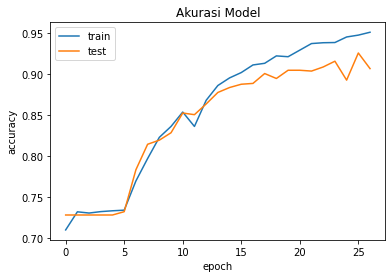

In [91]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

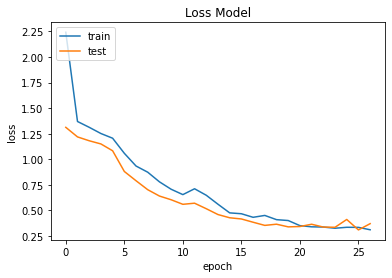

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [129]:
x = 'is there a delta flight from denver to san francisco'
tokenizer.fit_on_texts(x)
sequence_x = tokenizer.texts_to_sequences([x])
padding_x = pad_sequences(sequence_x)
sequence_x

[[21, 44, 14, 98, 9, 3, 12, 2, 13, 15]]

In [130]:
y_pred = model.predict(padding_x)
y_test_class = np.argmax(label_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [131]:
y_pred

array([[9.8532641e-01, 1.0934656e-03, 2.5306117e-05, 7.5268341e-05,
        1.1772057e-06, 1.6575018e-03, 2.7215166e-03, 7.9941304e-07,
        2.0236257e-04, 4.0665800e-09, 2.6528778e-07, 5.9893983e-04,
        4.1334298e-03, 7.5975964e-07, 3.7999509e-03, 2.1132674e-04,
        1.0635451e-04, 4.2371321e-05, 2.9830332e-08, 4.0353223e-07,
        7.9686089e-07, 1.6021161e-06]], dtype=float32)

In [132]:
y_pred_class

array([0])